In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from typing import Dict

In [2]:
# NOTE: For simplicity and comparison purposes, I only use 10 nodes in each graph

In [3]:
# NOTE: Each section contains the requested metrics for each graph (i.e. the "Complete"
# section contains the number of nodes and edges, average degree, degree distribution, 
# median distance, median distance distribution, radius, diameter, and density for a 
# complete graph) 

In [4]:
# NOTE: I use several helper functions to calculate the metrics (to avoid code duplication).  
# I also use two approaches to calculate each metric (the second approach is usually just 
# using built-in functionality from networkx) as a form of self-checking (what the assert 
# statements are doing)

### Helper Code

In [5]:
# My own implementation for calculating median distances; uses the Floyd Warshall
# algorithm
def median_distances(graph: nx.Graph) -> Dict[object, int]:
    median_distances = {}
    n_nodes = graph.number_of_nodes()
    distance_matrix = [[np.inf for _ in range(n_nodes)] for _ in range(n_nodes)]

    # Diagonal should be 0
    for i in range(n_nodes):
        distance_matrix[i][i] = 0

    # The nodes might have labels other than an integer, so we need a mapping from 
    # node label to index (in order to index into the distance matrix)
    node_indices, node_idx = {}, 0

    for node in graph.nodes:
        node_indices[node] = node_idx
        node_idx += 1

    # Nodes directly connected to each other should have a distance of 1
    for node_a, node_b in graph.edges:
        node_a_idx, node_b_idx = node_indices[node_a], node_indices[node_b]
        distance_matrix[node_a_idx][node_b_idx] = 1
        distance_matrix[node_b_idx][node_a_idx] = 1 # Assuming we're dealing with an undirected graph

    # Floyd Warshall algorithm
    for k in range(n_nodes):
        for i in range(n_nodes):
            for j in range(n_nodes):
                distance_matrix[i][j] = min(distance_matrix[i][j], distance_matrix[i][k] + distance_matrix[k][j])

    # Calculate the median distance for each node
    nodes_list = list(graph.nodes)

    for row in range(n_nodes):
        node_label = nodes_list[row]  # The node might have a label other than an integer
        node_distances = distance_matrix[row]
        median_distance = np.median(node_distances)
        median_distances[node_label] = median_distance

    return median_distances

In [6]:
# Function for median distance that uses networkx's built-in functionality (used to 
# check the correctness of my own implementation)
def median_distances_networkx(graph: nx.Graph) -> Dict[object, int]:
    median_distances = {}

    for node in graph.nodes:
        shortest_path_lengths = nx.single_source_shortest_path_length(graph, node)
        median_distance = np.median(list(shortest_path_lengths.values()))
        median_distances[node] = median_distance

    return median_distances

In [7]:
# My own implementation for calculating eccentricities; uses the Floyd Warshall
# algorithm (similar code as the median_distances function)
def eccentricity(graph: nx.Graph) -> Dict[object, int]:
    eccentricities = {}
    n_nodes = graph.number_of_nodes()
    distance_matrix = [[np.inf for _ in range(n_nodes)] for _ in range(n_nodes)]

    # Diagonal should be 0
    for i in range(n_nodes):
        distance_matrix[i][i] = 0

    # The nodes might have labels other than an integer, so we need a mapping from 
    # node label to index (in order to index into the distance matrix)
    node_indices, node_idx = {}, 0

    for node in graph.nodes:
        node_indices[node] = node_idx
        node_idx += 1

    # Nodes directly connected to each other should have a distance of 1
    for node_a, node_b in graph.edges:
        node_a_idx, node_b_idx = node_indices[node_a], node_indices[node_b]
        distance_matrix[node_a_idx][node_b_idx] = 1
        distance_matrix[node_b_idx][node_a_idx] = 1 # Assuming we're dealing with an undirected graph

    # Floyd Warshall algorithm
    for k in range(n_nodes):
        for i in range(n_nodes):
            for j in range(n_nodes):
                distance_matrix[i][j] = min(distance_matrix[i][j], distance_matrix[i][k] + distance_matrix[k][j])

    # Calculate the median distance for each node
    nodes_list = list(graph.nodes)

    for row in range(n_nodes):
        node_label = nodes_list[row]  # The node might have a label other than an integer
        node_distances = distance_matrix[row]
        max_distance = max(node_distances)
        eccentricities[node_label] = max_distance

    return eccentricities

In [8]:
# Function for eccentricities that uses networkx's built-in functionality (used to 
# check the correctness of my own implementation)
def eccentricity_networkx(graph: nx.Graph) -> Dict[object, int]:
    eccentricities = {}

    for node in graph.nodes:
        eccentricity = nx.eccentricity(graph, v=node)
        eccentricities[node] = eccentricity

    return eccentricities

In [9]:
# Calculates and prints the number of nodes and edges in the graph
def edges_and_vertices(graph: nx.Graph) -> None:
    # One way
    n_nodes = graph.number_of_nodes()
    n_edges = graph.number_of_edges()

    # Another way
    n_nodes_other = len(graph.nodes())
    n_edges_other = len(graph.edges())

    assert n_nodes == n_nodes_other and n_edges == n_edges_other

    print(f'Number of nodes: {n_nodes}')
    print(f'Number of edges: {n_edges}')

In [10]:
# Calculates and prints the average degree of the graph
def average_degree(graph: nx.Graph) -> None:
    # One way
    degrees = dict(graph.degree()).values()
    avg_degree = sum(degrees) / len(degrees)

    # Another way (theorem from class)
    n_nodes, n_edges = graph.number_of_nodes(), graph.number_of_edges()
    degree_sum = 2 * n_edges
    avg_degree_from_theorem = degree_sum / n_nodes

    assert avg_degree == avg_degree_from_theorem

    print(f'Average degree: {avg_degree}')

In [11]:
# Calculates and plots the degree distribution
def degree_distribution(graph: nx.Graph) -> None:
    # Use the Counter class to generate value counts
    degrees = dict(graph.degree()).values()
    degree_counts = Counter(degrees)

    # Print the counts so that we can double check that they match with 
    # the plot
    print(f'Degree counts: {degree_counts}')

    # Plot the distribution
    plt.bar(degree_counts.keys(), degree_counts.values())
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title('Degree Distribution')
    plt.show()

In [12]:
# Calculates and prints the median distance for each node
def med_distances(graph: nx.Graph) -> None:
    # Generated from my implementation of the Floyd Warshall algorithm
    m_distances = median_distances(graph)

    # Generated from networkx's built-in functionality
    m_distances_other = median_distances_networkx(graph)

    assert m_distances == m_distances_other

    print(f'Median distances for each node:\n{m_distances}')

In [13]:
# Calculates and plots the median distance distribution
def med_distance_distribution(graph: nx.Graph) -> None:
    # Use the Counter class to generate value counts
    m_distances = median_distances(graph)
    med_distance_counts = Counter(m_distances.values())

    # Print the counts so that we can double check that they match with 
    # the plot
    print(f'Median distance counts: {med_distance_counts}')

    # Plot the distribution
    plt.bar(med_distance_counts.keys(), med_distance_counts.values())
    plt.xlabel('Median Distance')
    plt.ylabel('Count')
    plt.title('Median Distance Distribution')
    plt.show()

In [14]:
# Calculates and prints the radius of the graph
def radius(graph: nx.Graph) -> None:
    # Eccentricities using my own code
    eccents = eccentricity(graph)

    # Eccentricities using networkx
    eccents_other = eccentricity_networkx(graph)

    assert eccents == eccents_other

    radius = min(eccents.values())

    print(f'Radius: {radius}')

In [15]:
# Calculates and prints the diameter of the graph (very similar to my radius function)
def diameter(graph: nx.Graph) -> None:
    # Eccentricities using my own code
    eccents = eccentricity(graph)

    # Eccentricities using networkx
    eccents_other = eccentricity_networkx(graph)

    assert eccents == eccents_other

    diameter = max(eccents.values())

    print(f'Diameter: {diameter}')

In [16]:
# My own implementation for calculating density; uses the equation 
# from the lecture slides
def calculate_density(graph: nx.Graph) -> float:
    n_nodes, n_edges = graph.number_of_nodes(), graph.number_of_edges()

    # Equation from the slides
    density = (2 * n_edges) / (n_nodes * (n_nodes - 1))

    return density

In [17]:
# Calculates and prints the density of the graph
def density(graph: nx.Graph) -> None:
    # Density using my own code
    density = calculate_density(graph)

    # Density using networkx
    density_other = nx.density(graph)

    assert density == density_other

    print(f'Density: {density}')

### Complete

In [18]:
# The graph (with 10 nodes)
G = nx.complete_graph(10)

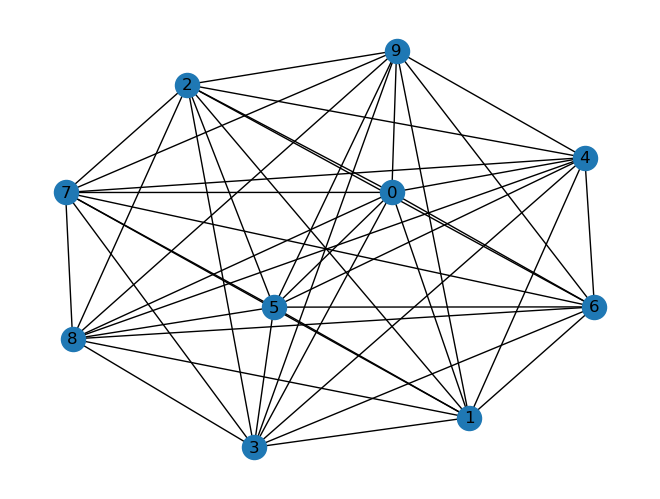

In [19]:
# Plot of the graph (for visualization purposes)
nx.draw(G, with_labels=True)
plt.show()

In [20]:
# Number of nodes and edges
edges_and_vertices(G)

Number of nodes: 10
Number of edges: 45


In [21]:
# Average degree
average_degree(G)

Average degree: 9.0


Degree counts: Counter({9: 10})


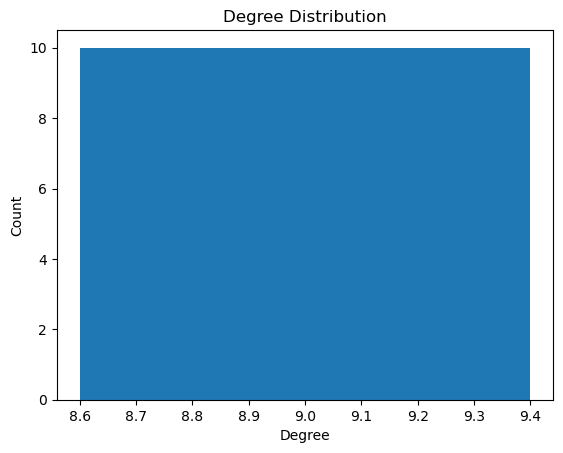

In [22]:
# Degree distribution
degree_distribution(G)

In [23]:
# Median distances
med_distances(G)

Median distances for each node:
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}


Median distance counts: Counter({1.0: 10})


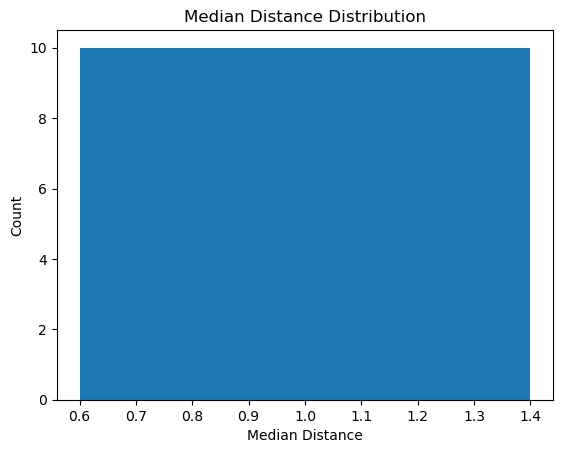

In [24]:
# Median distance distribution
med_distance_distribution(G)

In [25]:
# Radius
radius(G)

Radius: 1


In [26]:
# Diameter
diameter(G)

Diameter: 1


In [27]:
# Density
density(G)

Density: 1.0


### Barbell

In [28]:
# The graph (10 nodes: 4 in each barbell, 2 in the path connecting the barbells)
G = nx.barbell_graph(4, 2)

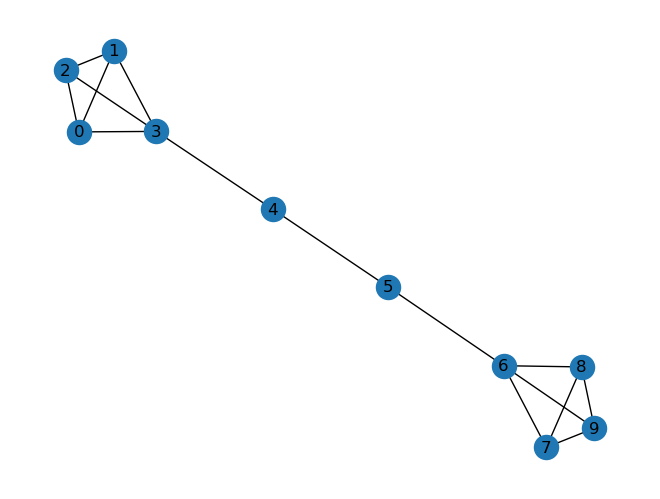

In [29]:
# Plot of the graph (for visualization purposes)
nx.draw(G, with_labels=True)
plt.show()

In [30]:
# Number of nodes and edges
edges_and_vertices(G)

Number of nodes: 10
Number of edges: 15


In [31]:
# Average degree
average_degree(G)

Average degree: 3.0


Degree counts: Counter({3: 6, 4: 2, 2: 2})


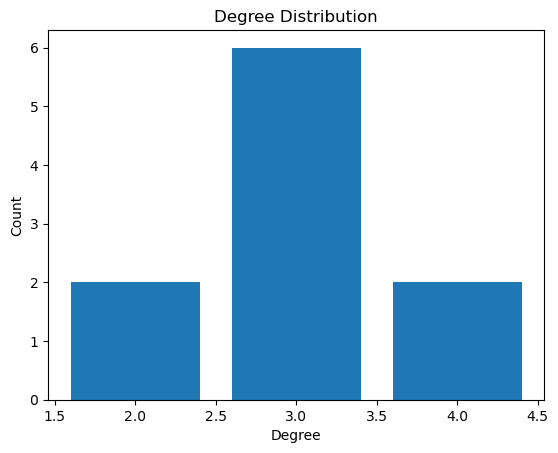

In [32]:
# Degree distribution
degree_distribution(G)

In [33]:
# Median distances
med_distances(G)

Median distances for each node:
{0: 2.5, 1: 2.5, 2: 2.5, 3: 1.5, 4: 2.0, 5: 2.0, 6: 1.5, 7: 2.5, 8: 2.5, 9: 2.5}


Median distance counts: Counter({2.5: 6, 1.5: 2, 2.0: 2})


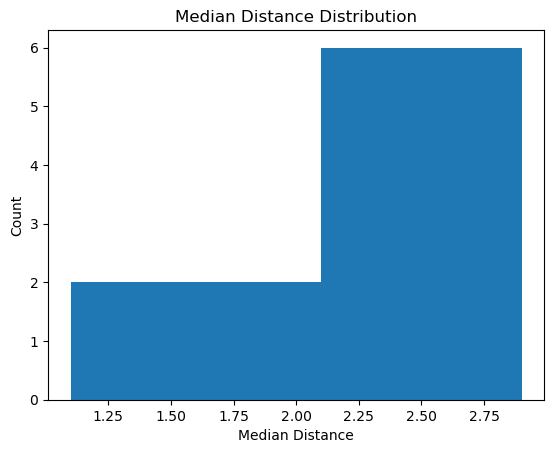

In [34]:
# Median distance distribution
med_distance_distribution(G)

In [35]:
# Radius
radius(G)

Radius: 3


In [36]:
# Diameter
diameter(G)

Diameter: 5


In [37]:
# Density
density(G)

Density: 0.3333333333333333


### Cycle

In [38]:
# The graph (with 10 nodes)
G = nx.cycle_graph(10) 

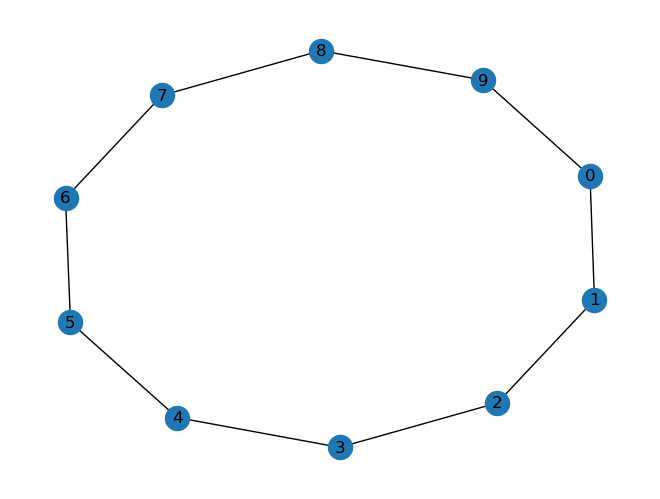

In [39]:
# Plot of the graph (for visualization purposes)
nx.draw(G, with_labels=True)
plt.show()

In [40]:
# Number of nodes and edges
edges_and_vertices(G)

Number of nodes: 10
Number of edges: 10


In [41]:
# Average degree
average_degree(G)

Average degree: 2.0


Degree counts: Counter({2: 10})


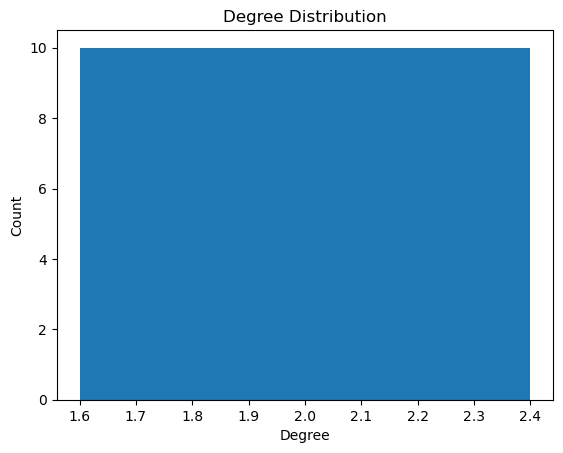

In [42]:
# Degree distribution
degree_distribution(G)

In [43]:
# Median distances
med_distances(G)

Median distances for each node:
{0: 2.5, 1: 2.5, 2: 2.5, 3: 2.5, 4: 2.5, 5: 2.5, 6: 2.5, 7: 2.5, 8: 2.5, 9: 2.5}


Median distance counts: Counter({2.5: 10})


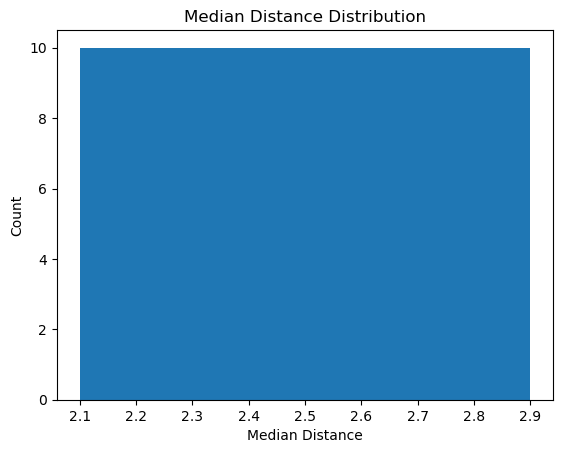

In [44]:
# Median distance distribution
med_distance_distribution(G)

In [45]:
# Radius
radius(G)

Radius: 5


In [46]:
# Diameter
diameter(G)

Diameter: 5


In [47]:
# Density
density(G)

Density: 0.2222222222222222


### Lattice

In [48]:
# The graph (with 10 nodes)
G = nx.grid_2d_graph(5, 2) 

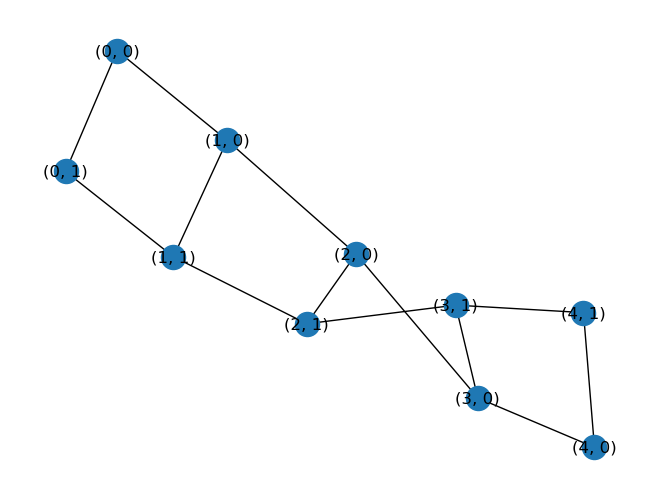

In [49]:
# Plot of the graph (for visualization purposes)
nx.draw(G, with_labels=True)
plt.show()

In [50]:
# Number of nodes and edges
edges_and_vertices(G)

Number of nodes: 10
Number of edges: 13


In [51]:
# Average degree
average_degree(G)

Average degree: 2.6


Degree counts: Counter({3: 6, 2: 4})


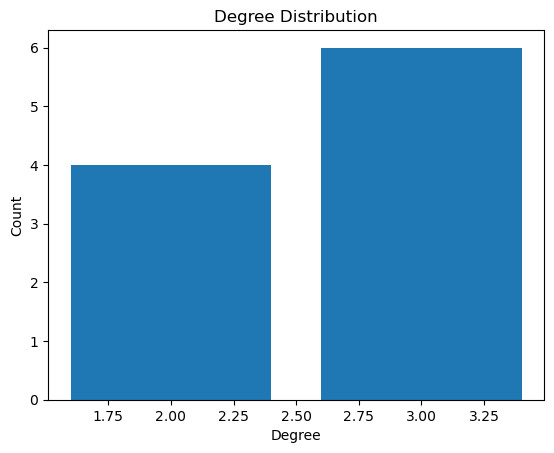

In [52]:
# Degree distribution
degree_distribution(G)

In [53]:
# Median distances
med_distances(G)

Median distances for each node:
{(0, 0): 2.5, (0, 1): 2.5, (1, 0): 2.0, (1, 1): 2.0, (2, 0): 2.0, (2, 1): 2.0, (3, 0): 2.0, (3, 1): 2.0, (4, 0): 2.5, (4, 1): 2.5}


Median distance counts: Counter({2.0: 6, 2.5: 4})


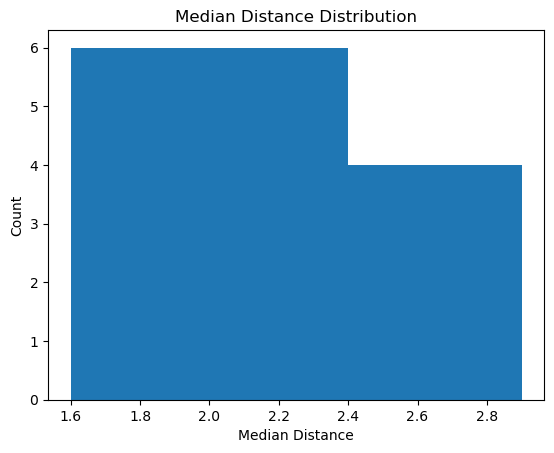

In [54]:
# Median distance distribution
med_distance_distribution(G)

In [55]:
# Radius
radius(G)

Radius: 3


In [56]:
# Diameter
diameter(G)

Diameter: 5


In [57]:
# Density
density(G)

Density: 0.28888888888888886


### Ladder

In [58]:
# The graph (with 10 nodes)
G = nx.ladder_graph(5) 

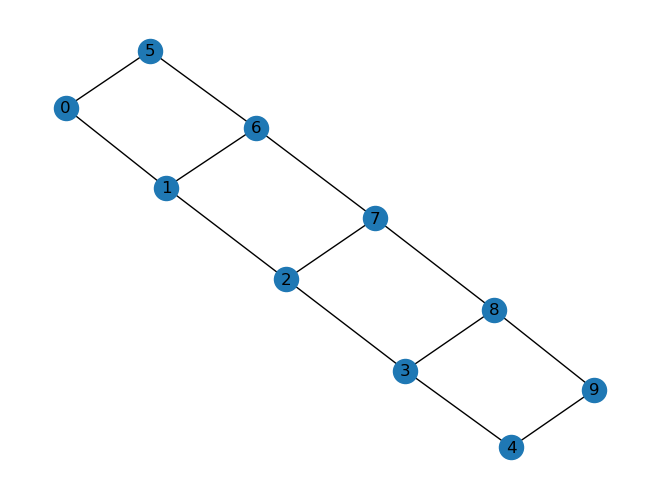

In [59]:
# Plot of the graph (for visualization purposes)
nx.draw(G, with_labels=True)
plt.show()

In [60]:
# Number of nodes and edges
edges_and_vertices(G)

Number of nodes: 10
Number of edges: 13


In [61]:
# Average degree
average_degree(G)

Average degree: 2.6


Degree counts: Counter({3: 6, 2: 4})


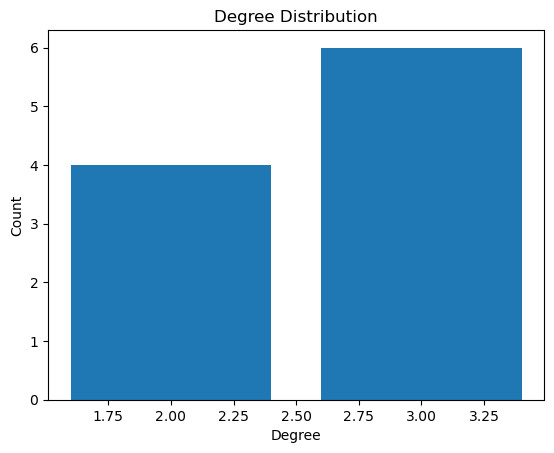

In [62]:
# Degree distribution
degree_distribution(G)

In [63]:
# Median distances
med_distances(G)

Median distances for each node:
{0: 2.5, 1: 2.0, 2: 2.0, 3: 2.0, 4: 2.5, 5: 2.5, 6: 2.0, 7: 2.0, 8: 2.0, 9: 2.5}


Median distance counts: Counter({2.0: 6, 2.5: 4})


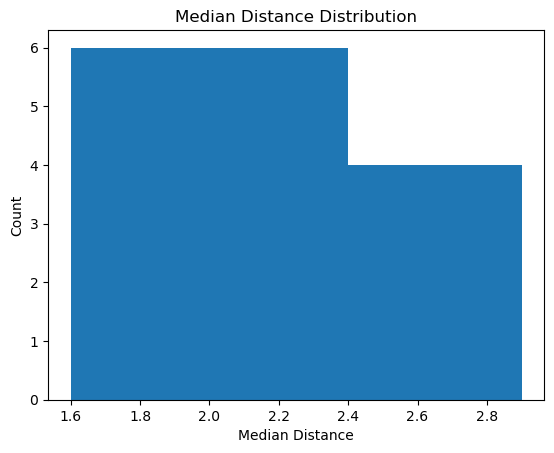

In [64]:
# Median distance distribution
med_distance_distribution(G)

In [65]:
# Radius
radius(G)

Radius: 3


In [66]:
# Diameter
diameter(G)

Diameter: 5


In [67]:
# Density
density(G)

Density: 0.28888888888888886


### Summary

A few observations for each graph:
<ul>
    <li> The complete graph, unsurprisingly, has the highest density (1.0) since every node is connected to every other node.  Due to this fact, the degree and median distance distributions contain only one bin (the degree and median distance for every node is the same).  Its radius and diameter are also the same.
    <li> The barbell graph's density distribution follows more of a bell curve (normal distribution) due to the two complete graphs on either end and the two nodes in the middle that connect the barbells.  Its median distance distribution could be viewed as more of a left-skewed distribution, again due to the fact that there are two nodes in the middle of the graph that connect the barbells.
    <li> Similar to the complete graph, the cycle graph's degree and median distance distributions contain only one bin (every node has two edges).  However, opposite of the complete graph, its density is the lowest of the five graphs.
    <li> The lattice graph has a left-skewed degree distribution, due to the fact that the four "end" nodes each have a degree of two, whereas the other nodes ("middle" nodes) have a degree of 3.  Its median distance distribution is right-skewed, due to the fact that the four "end" nodes have a slightly larger median distance than the other nodes.
    <li> The metrics for the ladder graph are the same as the lattice graph.  This is because the only way to create a lattic graph with 10 nodes is to create a 5 by 2 grid, which is the same as a ladder graph with 10 nodes.  I used 10 nodes in each graph for comparison purposes.
</ul>